In [4]:
from pyforest import *

In [8]:
train = pd.read_csv("~/Downloads/TitanicTrain.csv")
test = pd.read_csv("~/Downloads/TitanicTest.csv")

In the World of ML, Generalization is the key to win ML Competitions.

The Generalized Data will get you the winning edge.

In [9]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,1,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,1,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,1,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [31]:
train.Family_On_Board.unique()

array(['Singles', 'Large Family', 'Small Family'], dtype=object)

In [10]:
pd.DataFrame(train.groupby("Family_On_Board")["Survived"].value_counts()).T

Family_On_Board Large Family     Singles      Small Family    
Survived                   0   1       0    1            1   0
Survived                  60  31     446  252           59  43

1. Age is Dependant on gender or Title, Family on Board

### Hypothesis Test - Numerical Vs Numerical

Because I have a Hypothesis (Opinion) about a particular situation that it might be true and it might not be true.

Types of Test

1. Z Test - Population metrics are available such as Pop Mean or SD.

2. T Test - This test is suitable when the sample mean or sd is available.

### Is there any example for the above tests.

The Average IQ of Adult Population is 100. A Pyschological Researcher belives that it has changed. He takes a random sample of 100 people and performs the IQ Test and he finds that the sample average IQ is now 105 with sd of 10.

Find out if the statement about the population is correct or not.

T test is heavily inclined test towards Sample where n is less than or equal to 30 rows of data.

### Hyp Test - Numerical Vs Categorical

#### ANOVA - Analysis of Variance

1. If I have more than two categories/groups to consider
2. Homogeneity of Variance and Normality is the basic assumption to be applied on the data.


In [13]:
# Libraries for ANOVA
import scipy.stats as stats
import statsmodels.api as sms
from statsmodels.formula.api import ols

## Test the Statement - Age is Dependant on Titles

### Null Hyp

H0: The Age of the Passengers is equal across the Gender. In other words, the Age is indifferent from the Gender.

### Alt Hyp:

H1: The Age of the Passenger is Dependant on the Gender.

### Level of Significance

Alpha =0.05

### Test Inference

If the P Value is less than the LOS, then we reject the Null Hypothesis because there is a very low possibility for the H0 to be true in all respects and hence the test holds significance as per the statistics generated.

In [10]:
newtrain = train.dropna()

In [11]:
newtrain.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [14]:
stats.f_oneway(newtrain.loc[newtrain.Sex=="male", "Age"],
              newtrain.loc[newtrain.Sex=="female", "Age"])

F_onewayResult(statistic=9.19313968472156, pvalue=0.0025002091122819548)

In [15]:
## Anova Table - FINDING IF AGE IS DEPENDANT ON SEX, TITLES AND FAMILY ON BOARD
model = ols("Age~Family_On_Board+Sex+Titles", data = newtrain).fit()

In [16]:
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Family_On_Board,2.0,17798.285492,8899.142746,71.030338,2.581870e-29
Sex,1.0,263.285072,263.285072,2.101464,1.475161e-01
Titles,5.0,36783.477943,7356.695589,58.718978,9.155593e-53
Residual,876.0,109750.978344,125.286505,NaN,NaN


#### Inference

The Age is dependant on Family on Board, Titles and Gender as the P Value is less than 0.05 in all the cases.

In [17]:
combined.groupby("Titles")["Age"].describe()

NameError: name 'combined' is not defined

This shows that the Age is Dependant on the Gender

In [18]:
combined.info()

NameError: name 'combined' is not defined

### Problem: I want to find out if the Survival is Dependant on the Age

Step01: H0: Survival is totally independent of the Age.

Step02: H1: Survival is heavily relying on Age

Step03: Choose the Level of Alpha/Significance -0.05

Step 04: Find the P Value and Conclude the F Test

In [19]:
# F Test
model = ols("Survived~Age", data = newtrain).fit()

In [20]:
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,0.523436,0.523436,2.217958,0.13677
Residual,883.0,208.387298,0.235999,NaN,NaN


Inference - Since we find that the P VAlue is greater than 5% and hence we fail to reject the H0 which is that the Survival is Not Dependant on the Age 

In [21]:
newtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,1,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,1,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,1,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


## Chi Square Test

When we wish to find out the relationship between the Cat Variables

For e.g. I want to find out if the Survival is based on PClass

H0: The Survival is Independent of PClass

H1: The Survival is Dependent of the PClass

Test of Hypothesis - Since the variables are categorical in nature and hence we would apply Chi Square Goodness of Fit Test.


In [22]:
import scipy.stats as stats

In [23]:
pd.DataFrame(newtrain.groupby("Survived")["Titles"].value_counts()).T

Survived    0                           1                         
Titles     Mr Miss Mrs Master Others Miss Mrs  Mr Master Others Ms
Titles    435   55  25     17     15  126  97  80     23     11  1

In [24]:
array = np.array([[435,55,25,17,15,0],[80,126,97,23,11,1]])
chistats, pvalue, df, exp_freq = stats.chi2_contingency(array)

In [25]:
#print(chistats)
print("The P Value is",pvalue)
#print(df)
#print(exp_freq)

The P Value is 2.6822979231163236e-59


#### Inference

Since the P Value is Less than 0.05 and Hence Reject the Ho which is that the Survival is NOT BASED on P Value. Here we find that the Survival has a relation with the Passenger Class.

#### Title and PClass appears to be a very strong variable as per Chi Sq Test.

We will build a Random Forest Model to find if this is correct or not

In [106]:
from sklearn.model_selection import train_test_split

In [133]:
x = newtrain.drop(["Survived", "titles"], axis = 1)
y = newtrain.Survived

In [134]:
ohetrain = pd.get_dummies(x)

In [135]:
xtrain,xtest,ytrain,ytest = train_test_split(ohetrain,y,test_size = 0.20,
                                             random_state=123)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy")

In [137]:
rfmodel = rf.fit(xtrain,ytrain)

C:\Users\It\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [138]:
pred = rf.predict(xtest)

#### Classification Model Metrics & Finding Feature Importance

1. Accuracy
2. Classification Report
3. Confusion Matrix
4. Cohen's Kappa

In [156]:
# Accuracy
from sklearn.metrics import matthews_corrcoef, accuracy_score,classification_report, confusion_matrix, cohen_kappa_score

In [140]:
print("The Accuracy of RF Model is", accuracy_score(ytest, pred))

The Accuracy of RF Model is 0.8022598870056498


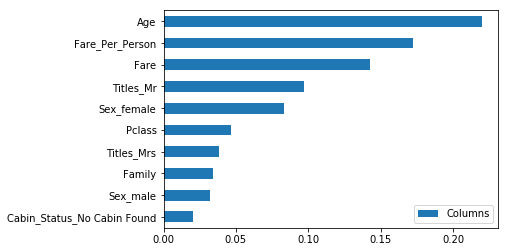

In [144]:
# Finding the Important Variables/Features
pd.DataFrame(rf.feature_importances_, index = ohetrain.columns, 
             columns = ["Columns"]).sort_values(by = 
                                                "Columns").tail(10).plot(kind = "barh")
plt.show()

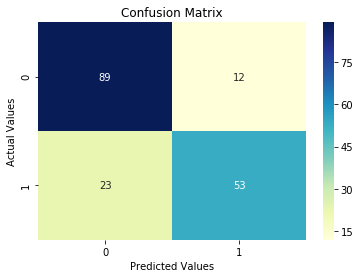

In [153]:
sns.heatmap(confusion_matrix(ytest, pred), annot = True, cmap = "YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [154]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       101
           1       0.82      0.70      0.75        76

    accuracy                           0.80       177
   macro avg       0.81      0.79      0.79       177
weighted avg       0.80      0.80      0.80       177



In [155]:
print(cohen_kappa_score(ytest, pred))

0.5891092392385753


In [157]:
print(matthews_corrcoef(ytest, pred))

0.5940836504464574


### Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")

In [159]:
pred_df = dtree.fit(xtrain,ytrain).predict(xtest)

In [166]:
accuracy_score(ytest,pred_df)

0.7853107344632768

In [160]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [161]:
pred_knn = knn.fit(xtrain,ytrain).predict(xtest)

In [167]:
accuracy_score(ytest, pred_knn)

0.7627118644067796

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
pred_gbm = gbm.fit(xtrain,ytrain).predict(xtest)

In [173]:
accuracy_score(ytest, pred_gbm)

0.8248587570621468

In [181]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()

In [182]:
pred_bagg = bagg.fit(xtrain,ytrain).predict(xtest)

In [183]:
accuracy_score(ytest, pred_bagg)

0.8192090395480226

In [220]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=rf, n_estimators=1000)

In [221]:
pred_ada = ada.fit(xtrain,ytrain).predict(xtest)

In [222]:
accuracy_score(ytest, pred_ada)

0.8022598870056498

### Ensemble of These Models - Voting Classifier

In [226]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("rf",rf),("GBM", gbm),
                                  ("bagg", bagg),
                                  ("Tree",dtree),
                                 ("Ada", ada),("knn", knn)])

In [227]:
pred_vc = vc.fit(xtrain,ytrain).predict(xtest)

In [228]:
accuracy_score(ytest, pred_vc)

0.8305084745762712

In [229]:
cohen_kappa_score(ytest, pred_vc)

0.6483909415971394

In [230]:
matthews_corrcoef(ytest, pred_vc)

0.6528906797548438